# Выявление закономерностей, влияющих на успешность видеоигр

### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
* Данные за 2016 год могут быть неполными.

### Задача: Выявить определяющие успешность игры закономерности, для того чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

### План работы:

* ##### Часть 1 Изучение общей информации:
  * Импортирование библиотиек и изучение файлов с данным;
  * Выявление базовых проблем в данных
* ##### Часть 2 Подготовка данных:
  * Преобразование данных к нужным типам и приведение к нижнему регистру;
  * Обработка пропусков;
  * Добавление столбца(ов) для дальнейшего анализа
* ##### Часть 3 Исследовательский анализ:
  * Анализ динамики изменений в индустрии;
  * Опеределение актуального периода для прогноза продаж;
  * Анализ продаж по платформам;
  * Определение влияния жанра на продажи и прибыль
* ##### Часть 4 Портереты пользователей по регионам:
  * Топ-5 самых популярных платформ и жанров;
  * Влияние рейтинга ESRB на продажи по регионам
* ##### Часть 5 Проверка гипотез:
  * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  * Средние пользовательские рейтинги жанров Action и Sports разные
* ##### Часть 6 Общий вывод.

## Часть 1 Изучение общей информации

### Импортирование библиотиек и изучение файлов с данным

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df)
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Выявление базовых проблем в данных

При первом взгляде на таблицу были выявленны следующие проблемы:
1) Не приведенные к нижнему регистру названия столбцов;
2) Наличие пропусков;
3) Неверны типы данных в столбцах (Year_of_Release, User_Score)

## Часть 2 Подготовка данных

## Преобразование данных к нужным типам и приведение к нижнему регистру

In [3]:
df.columns = df.columns.str.lower() # Приведение названий столбцов к нижнему регистру
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
df['name'].str.lower()

0                           wii sports
1                    super mario bros.
2                       mario kart wii
3                    wii sports resort
4             pokemon red/pokemon blue
                     ...              
16710    samurai warriors: sanada maru
16711                 lma manager 2007
16712          haitaka no psychedelica
16713                 spirits & spells
16714              winning post 8 2016
Name: name, Length: 16715, dtype: object

In [5]:
for x in ['name', 'platform', 'genre','user_score', 'rating']:  # Привели все столбцыс типом object к нижнему регистру
    df[x] = df[x].str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format ='%Y')
df['year_of_release'] = pd.DatetimeIndex(df['year_of_release']).year.astype('Int64')
display(df)
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null object
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


Поменял тип данных, так как года не могут быть нецелочисленными.

In [7]:
#df[(df['user_score'] != "tbd") and (not df['user_score'].isnull())]['user_score']

In [8]:
#df.query('user_score != "tbd" and not user_score.isnull()')['user_score'] = pd.to_numeric(df.query('user_score != "tbd" and not user_score.isnull()')['user_score']) * 10
#df[(df['user_score'] != "tbd") and not (df['user_score'].isnull())]['user_score']

## Часть 2 Подготовка данных

### Обработка пропусков

Возможные причины появления пропусков:
- name      -       Отсутствие единого названия игры / ошибка в выгрузке   
- platform   -      Игра выпущенна на нескольких платформах  / ошибка в выгрузке
- year_of_release - Нет официальной даты релиза  / ошибка в выгрузке
- genre    -      Нет подходящего определенного жанра / несколько жанров в одном   / ошибка в выгрузке
- na_sales -        Отсутствие продаж игры в на данной территории / ошибка в выгрузке  
- eu_sales  -       Отсутствие продаж игры в на данной территории / ошибка в выгрузке
- jp_sales   -      Отсутствие продаж игры в на данной территории / ошибка в выгрузке
- other_sales -     Отсутствие продаж игры в на данной территории / ошибка в выгрузке
- critic_score -    Возможно некоторые игры не набрали достаточно оценок критиков / ошибка в выгрузке
- user_score  - Возможно некоторые игры не набрали достаточно оценок пользователей / ошибка в выгрузке 
- rating        -   Не всем играм был присвоен рейтинг от ESRB  / ошибка в выгрузке

In [9]:
df['critic_score'] = df['critic_score'].fillna(-1) # Для расчтов

In [10]:
df['user_score'] = df['user_score'].replace("tbd", -1)
df['user_score'] = df['user_score'].fillna(-1)

In [11]:
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

В столбце user_score заменим tbd и пустые значения на -1 для приведения столбца в числовой тип и возможности без проблем совершать математические операции.
Остальные пропуски я не трогаю, так как нет возможности их запросить, корректно заполнить и нельзя удалять, так как можно исказить этим реальное положение дел.

In [12]:
df['rating'].unique() # Проверка есть ли tbd в столбце

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [13]:
rating = {"ec": 1, "e": 2, "e10+": 3, "t": 4, "m": 5, "ao": 6, "rp": -1, "k-a": 7} # Словарь для замены значений

In [14]:
df['rating'] = df['rating'].fillna(-1)
df['rating'] = df['rating'].replace("ec", 1)
df['rating'] = df['rating'].replace("e", 2)
df['rating'] = df['rating'].replace("e10+", 3)
df['rating'] = df['rating'].replace("t", 4)
df['rating'] = df['rating'].replace("m", 5)
df['rating'] = df['rating'].replace("ao", 6)
df['rating'] = df['rating'].replace("rp", -1)
df['rating'] = df['rating'].replace("k-a", 7) # Не нашел такого значения рейтинга, но на всякий случай фиксирую
# Для дальнейшего анализа переводим столбец в чилосовой формат

In [15]:
df['rating'].unique()

array([ 2, -1,  5,  4,  3,  7,  6,  1])

In [16]:
df['critic_score'].unique() # Проверка есть ли tbd в столбце

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null object
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null object
rating             16715 non-null int64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [18]:
df['user_score'] = df['user_score'].astype('float')
df['user_score'] = df['user_score'] * 10
df['user_score'] = df['user_score'].astype('int')# Домнжили на 10 чтобы рейтинг был по 100 бальной шкале как и в критике
 # Теперь у нас пустые значения не -1 а -10 (никак ни на что не влияет - запомнили)

In [19]:
df['user_score']

0        80
1       -10
2        83
3        80
4       -10
         ..
16710   -10
16711   -10
16712   -10
16713   -10
16714   -10
Name: user_score, Length: 16715, dtype: int64

Поменяли тип столбца user_score на целочисленный, чтобы можно было совершать с ним различные математические операции.

In [20]:
df['critic_score'] = df['critic_score'].astype('Int64')

Привели оценки к целочисленным типам и одинаковой шкале для удобства.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null object
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null Int64
user_score         16715 non-null int64
rating             16715 non-null int64
dtypes: Int64(1), float64(4), int64(2), object(4)
memory usage: 1.4+ MB


### Добавление столбца(ов) для дальнейшего анализа

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['total_sales'] 

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

## Часть 3 Исследовательский анализ

### Анализ динамики изменений в индустрии

In [23]:
df.pivot_table(index='year_of_release', values='user_score', aggfunc='count')

,user_score
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


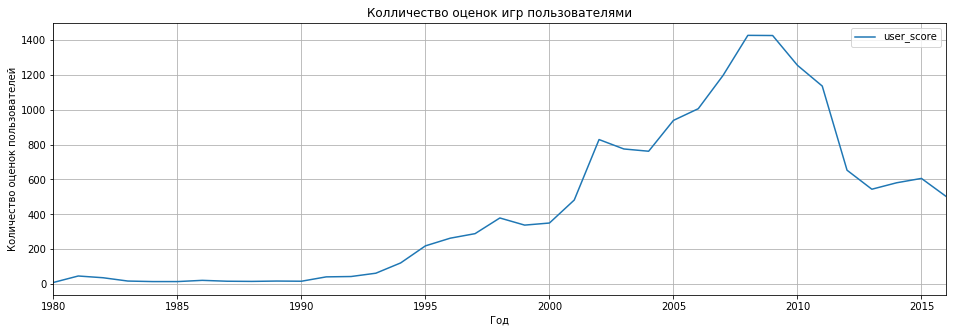

In [24]:
df.pivot_table(index='year_of_release', values='user_score', aggfunc='count').plot(xlim=(1980, 2016), grid=True, figsize=(16,5))
plt.title("Колличество оценок игр пользователями")
plt.xlabel('Год')
plt.ylabel('Количество оценок пользователей')
plt.show()

Мне кажется, что для анализа необходимо взять данные с 2012 года (где количество игр в год несильно колебалось вплоть до 2016 года), так как в прогнозе важна именно текущее положение дел на рынке, прошлые данные нам, мало что скажут об этом. Разве что можно предположить, что цикл (от роста до спада 19 лет), циклы обычно со временем становятся короче, но не настолько чтобы прогнозировать рост к 2017 году.

In [25]:
df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3do,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ds,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
gb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
top_platforms = df.groupby(['platform'])['total_sales'].sum().nlargest(10)
top_platforms

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
Name: total_sales, dtype: float64

In [27]:
df_top_platforms = df.query('platform in @top_platforms.index')
df_top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,80,2,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,83,2,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,80,2,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,85,2,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,66,2,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.00,-1,-10,-1,0.01
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,-1,-10,-1,0.00
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-10,-1,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1,-10,-1,0.01


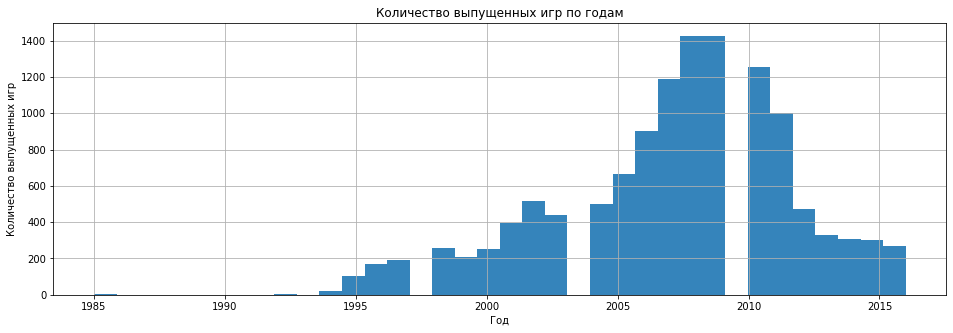

In [28]:
df_top_platforms['year_of_release'].hist(bins=36, figsize=(16,5), alpha=0.9)
plt.title("Количество выпущенных игр по годам")
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.show()

In [29]:
count_year_ps2 = df_top_platforms.query('platform == "ps2"').groupby('year_of_release')['year_of_release'].count()
count_year_x360 = df_top_platforms.query('platform == "x360"').groupby('year_of_release')['year_of_release'].count()
count_year_ps3 = df_top_platforms.query('platform == "ps3"').groupby('year_of_release')['year_of_release'].count()
count_year_wii = df_top_platforms.query('platform == "wii"').groupby('year_of_release')['year_of_release'].count()
count_year_ds = df_top_platforms.query('platform == "ds"').groupby('year_of_release')['year_of_release'].count()
count_year_ps = df_top_platforms.query('platform == "ps"').groupby('year_of_release')['year_of_release'].count()

In [31]:
def plot_years_sales(df, count_year, title):
    df.plot(kind='hist', ylim=(0, 500), bins = 35,  grid=True)
    plt.title(title)
    plt.xlabel('Год')
    plt.ylabel('Количество выпущенных игр')
    plt.show()
    
    count_year.plot()
    plt.title(title)
    plt.xlabel('Год')
    plt.ylabel('Количество выпущенных игр')
    plt.show()
    
    display(count_year.describe())
    
   # for i in range(len(count_year)):
    #    if (count_year[0] >= count_year[i]):
     #       print('Жизненный цикл', platform, count_year.index[i] - count_year.index[0])

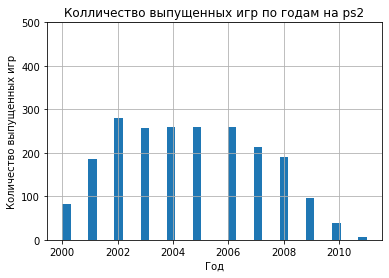

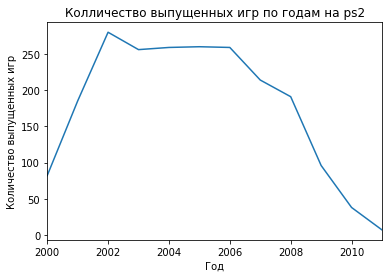

count     12.000000
mean     177.250000
std       96.588278
min        7.000000
25%       92.500000
50%      202.500000
75%      259.000000
max      280.000000
Name: year_of_release, dtype: float64

In [32]:
plot_years_sales(df_top_platforms.query('platform == "ps2"')['year_of_release'], count_year_ps2, "Колличество выпущенных игр по годам на ps2")

PS2 имеет жизненный цикл продукта 10 лет, платформа была на пике популярности 2002-2006 года.

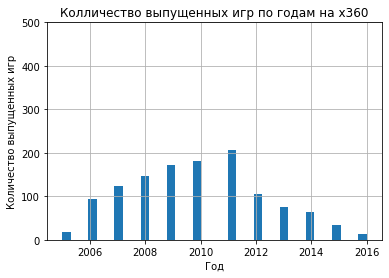

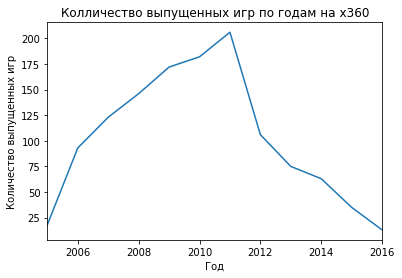

count     12.000000
mean     102.666667
std       64.877974
min       13.000000
25%       56.000000
50%       99.500000
75%      152.500000
max      206.000000
Name: year_of_release, dtype: float64

In [33]:
plot_years_sales(df_top_platforms.query('platform == "x360"')['year_of_release'], count_year_x360, "Колличество выпущенных игр по годам на x360")

x360 также имеет жизненный цикл примерно 10 лет, фаза стабильного роста с 2006 по 2011 года и спад с 2011 по 2016.

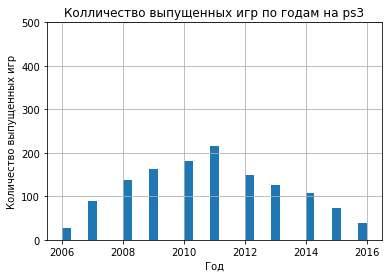

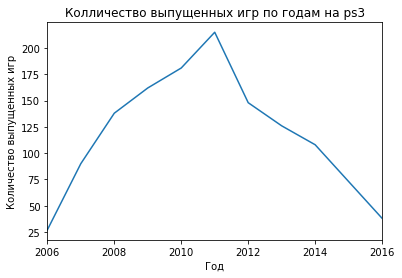

count     11.000000
mean     118.727273
std       58.533906
min       27.000000
25%       81.500000
50%      126.000000
75%      155.000000
max      215.000000
Name: year_of_release, dtype: float64

In [34]:
plot_years_sales(df_top_platforms.query('platform == "ps3"')['year_of_release'], count_year_ps3, "Колличество выпущенных игр по годам на ps3")

PS3 - очень схож с x360. также имеет жизненный цикл примерно 10 лет, фаза стабильного роста с 2006 по 2011 года и спад с 2011 по 2016.

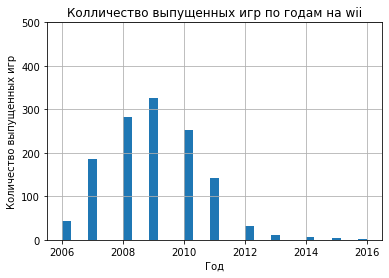

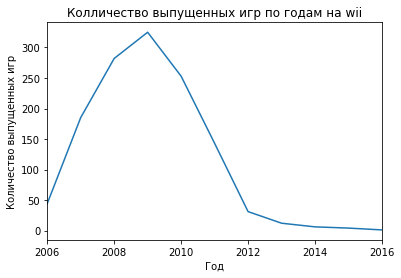

count     11.000000
mean     116.909091
std      125.132294
min        1.000000
25%        9.000000
50%       44.000000
75%      219.000000
max      325.000000
Name: year_of_release, dtype: float64

In [35]:
plot_years_sales(df_top_platforms.query('platform == "wii"')['year_of_release'], count_year_wii, "Колличество выпущенных игр по годам на wii")

wii с 2006 по 2009 года - бурный рост относительно ps3 и x360 и большая популярность в эти годы, но зато и стремительное падение с 2009-2012 на консоль игры почти не выпускались. Жизненный цикл приставки примерно = 6 лет.

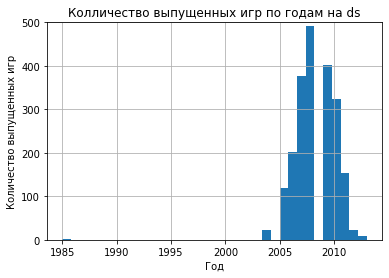

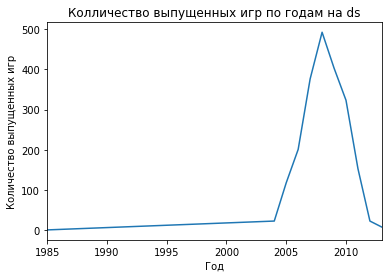

count     11.000000
mean     192.818182
std      178.904342
min        1.000000
25%       23.000000
50%      153.000000
75%      349.500000
max      492.000000
Name: year_of_release, dtype: float64

In [36]:
plot_years_sales(df_top_platforms.query('platform == "ds"')['year_of_release'], count_year_ds, "Колличество выпущенных игр по годам на ds")

ds в 1985 году были первые игры на данной приставки, но развития консоли в этих годах не было. По настоящему консоль начала развиваться с 2004 по 2008 года (бурный рост, лидер в эти года) и стремительный спад был с 2008-2013(популярность консоли почти достигла 0). Жизненный цикл примерно = 10 лет. 

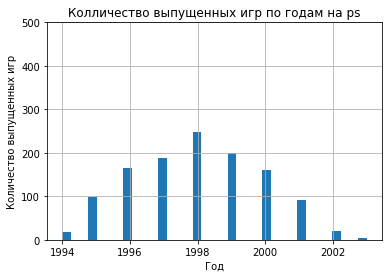

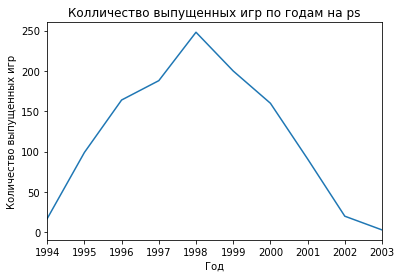

count     10.000000
mean     119.000000
std       85.967694
min        3.000000
25%       37.750000
50%      129.500000
75%      182.000000
max      248.000000
Name: year_of_release, dtype: float64

In [37]:
plot_years_sales(df_top_platforms.query('platform == "ps"')['year_of_release'], count_year_ps, "Колличество выпущенных игр по годам на ps")

Самая древняя из популярных платформ - ps имеет жизненный цикл с 1994-2002 года (8 лет), стабильный рост (1994 - 1998), равномерный спад (1998 - 2002).

В целом жизненный цикл платформ = 10 годам, новые платформы появляются еще на раннем спаде ранее популярных платформ (за 2 года примерно).  

### Опеределение актуального периода для прогноза продаж

Мне кажется, что для анализа необходимо взять данные с 2009 (где количество игр в год начало падать, вплоть до 2016 года), так как в прогнозе важна именно тенденция, прошлые данные нам, мало что скажут о текущем положении. Разве что можно предположить, что цикл (от роста до спада 19 лет), циклы обычно со временем становятся короче, но не настолько чтобы прогнозировать рост к 2017 году.

## Анализ продаж по платформам

In [38]:
df_relevant = df.query('year_of_release >= 2012') # Оставили данные только с 2012 года (актуальный период).

In [39]:
top_platforms_relevant = df_relevant.groupby('platform')['total_sales'].sum().nlargest(10)
top_platforms_relevant

platform
ps4     314.14
ps3     288.79
x360    236.54
3ds     194.61
xone    159.32
wiiu     82.19
pc       62.65
psv      49.18
wii      35.37
ds       12.55
Name: total_sales, dtype: float64

In [40]:
df_relevant_top_patforms = df_relevant.query('platform in @top_platforms_relevant.index')

Я беру для оценки топ-5 платформ, остальные сильно отстают.

In [41]:
display(df_relevant['na_sales'].sum())
display(df_relevant['eu_sales'].sum())
display(df_relevant['jp_sales'].sum())

590.97

506.82000000000005

192.58

In [42]:
def best_sales(df, title):
    df.plot(x='year_of_release', y='total_sales', grid=True)
    plt.title(title)
    plt.xlabel('Год')
    plt.ylabel('Совокупные продажи')
    plt.show()

In [43]:
ps4 = df_relevant_top_patforms.query('platform == "ps4"').groupby('year_of_release')['total_sales'].sum()
ps3 = df_relevant_top_patforms.query('platform == "ps3"').groupby('year_of_release')['total_sales'].sum()
x360 = df_relevant_top_patforms.query('platform == "x360"').groupby('year_of_release')['total_sales'].sum()
ds3 = df_relevant_top_patforms.query('platform == "3ds"').groupby('year_of_release')['total_sales'].sum()
xone = df_relevant_top_patforms.query('platform == "xone"').groupby('year_of_release')['total_sales'].sum()

In [44]:
#ps4_col = df_relevant_top_patforms.query('platform == "ps4"')['year_of_release']
#ps3_col = df_relevant_top_patforms.query('platform == "ps3"')['year_of_release']
#x360_col = df_relevant_top_patforms.query('platform == "x360"')['year_of_release']
#ds3_col = df_relevant_top_patforms.query('platform == "3ds"')['year_of_release']
#xone_col = df_relevant_top_patforms.query('platform == "xone"')['year_of_release']

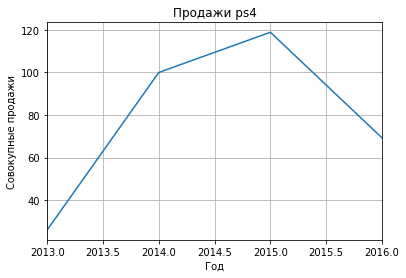

In [45]:
best_sales(ps4, "Продажи ps4")

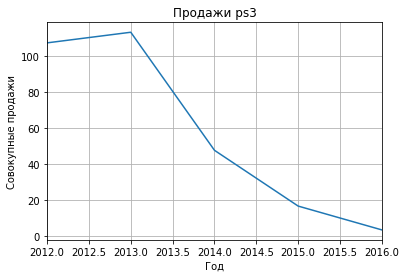

In [46]:
best_sales(ps3, "Продажи ps3" )

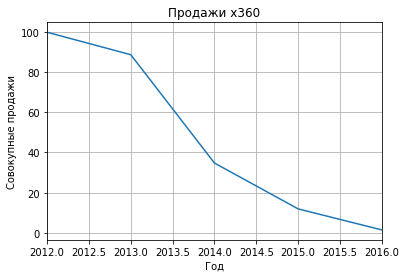

In [47]:
best_sales(x360, "Продажи x360")

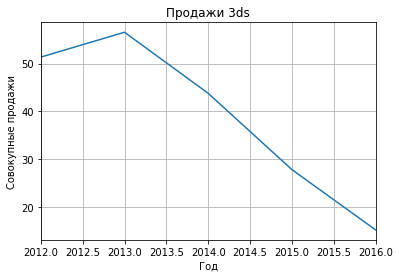

In [48]:
best_sales(ds3, "Продажи 3ds" )

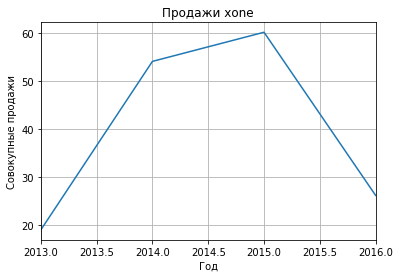

In [49]:
best_sales(xone, "Продажи xone" )

Из графиков и гистограмм видим, что у всех рассмотренных платформ за исключением ps4 и xone падают продажи и количество выпущенных игр на рассматриваемом промежутке времени (2012-2016) и уходят почти в 0. Это может говорить о том, что данные платформы уже отжили свое и передают брозды правления более современным платформам, такими платформами являются ps4 и xone (первые игры на платформах появились лишь в 2013 году), графики продаж и колличества выпущенных игр у этих платформ схожи, различие лишь в том, что абсолютные значения больше примерно в 2 раза у ps4. На графиках продаж xone и ps4 виден бурный рост с 2013 по 2014 год, медленный рост с 2014 по 2015 и сильный спад с 2015 по 2016 год. При этом колличество выпускаемых игр на данные платформы продолжило стабильно расти. 
Возможные причины спада 2015-2016: экономическая ситуация, отсутствие узнаваемых игр в выпуске 2016 года, увеличение колличества игр с жервтой качеством.

Не смотря на спад 2015-2016 годов платформы ps4 (в первую очередь) и xone имеют наибольшие перспективы как новые и развивающиейся платформы.

In [50]:
boxplot_ps4 = df_relevant_top_patforms.query('platform == "ps4"')
boxplot_ps3 = df_relevant_top_patforms.query('platform == "ps3"')
boxplot_x360 = df_relevant_top_patforms.query('platform == "x360"')
boxplot_ds3 = df_relevant_top_patforms.query('platform == "3ds"')
boxplot_xone = df_relevant_top_patforms.query('platform == "xone"')

In [51]:
def boxplot(df):
    #df['total_sales'].describe()   Почему не работает?
    df.boxplot(column='total_sales')
    plt.show()
    

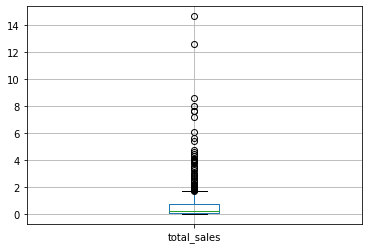

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [52]:
boxplot(boxplot_ps4)
boxplot_ps4['total_sales'].describe()

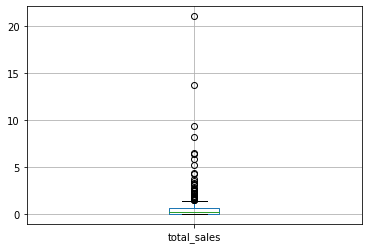

count    493.000000
mean       0.585781
std        1.462855
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: total_sales, dtype: float64

In [53]:
boxplot(boxplot_ps3) 
boxplot_ps3['total_sales'].describe()

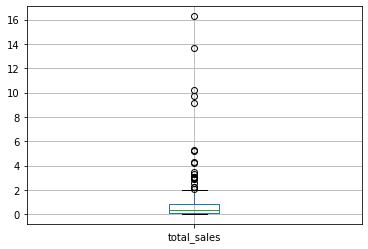

count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: total_sales, dtype: float64

In [54]:
boxplot(boxplot_x360)  
boxplot_x360['total_sales'].describe()

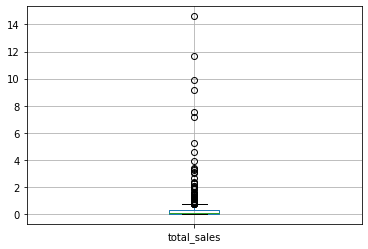

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: total_sales, dtype: float64

In [55]:
boxplot(boxplot_ds3)
boxplot_ds3['total_sales'].describe()

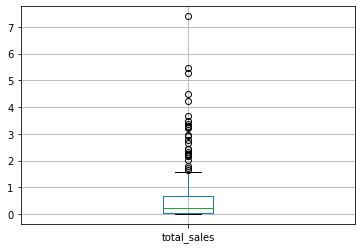

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [56]:
boxplot(boxplot_xone)
boxplot_xone['total_sales'].describe()

Колличество проданнах копий игр в среднем  равны между ps3 и xone (0.58, 064 соответственно),  ds 3 0.49. Максимальное среднее значение у ps4 и x360 (0.80, 0.81). 
У ps3 и xone примерно одинаковое значение 3-его квартиля (75% копий имеют продажи до определенного числа) - конкретно в цифрах: 0.61 и 0.68 соответственно и 0.73 ps4, у x360 = 0.87. У ds3 это значения 0.31. ps3 и x360 имеют большое количество выбросов, вплоть до 21.2, у xone же количество и значения выбросов поменьше (максимум 7.39). ps4, ds3 имеют также схожие выбросы - максимумы около 14-15. минимальный максимум среди платформ у xone = 7.39.

Продаж больше у более новых платформ, также имеется везде большое количество выбросов.

In [58]:
ps4_scatter = df_relevant_top_patforms.query('critic_score > 0 and user_score > 0 and platform == "ps4"')
ps3_scatter = df_relevant_top_patforms.query('critic_score > 0 and user_score > 0 and platform == "ps3"')
x360_scatter = df_relevant_top_patforms.query('critic_score > 0 and user_score > 0 and platform == "x360"')
ds3_scatter = df_relevant_top_patforms.query('critic_score > 0 and user_score > 0 and platform == "3ds"')
xone_scatter = df_relevant_top_patforms.query('critic_score > 0 and user_score > 0 and platform == "xone"')

In [60]:
ps3_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 16 to 16230
Data columns (total 12 columns):
name               213 non-null object
platform           213 non-null object
year_of_release    213 non-null object
genre              213 non-null object
na_sales           213 non-null float64
eu_sales           213 non-null float64
jp_sales           213 non-null float64
other_sales        213 non-null float64
critic_score       213 non-null Int64
user_score         213 non-null int64
rating             213 non-null int64
total_sales        213 non-null float64
dtypes: Int64(1), float64(5), int64(2), object(4)
memory usage: 21.8+ KB


In [61]:
def scatter(df, title, title_2):
    df.plot(x='critic_score', y = 'total_sales', kind='scatter', alpha=0.2)
    plt.title(title)
    plt.xlabel('Рейтинг критиков')
    plt.ylabel('Совокупные продажи')
    df.plot(x='user_score', y = 'total_sales', kind='scatter', alpha=0.2)
    plt.title(title_2)
    plt.xlabel('Совокупные продажи')
    plt.ylabel('Рейтинг пользователей')
    plt.show()
    #print(df['total_sales'].corr(df['critic_score']))
    #print(df['total_sales'].corr(df['user_score']))

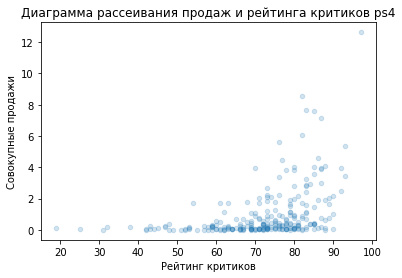

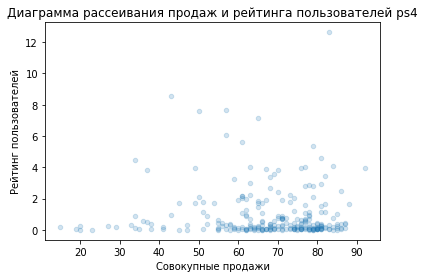

In [62]:
scatter(ps4_scatter, 'Диаграмма рассеивания продаж и рейтинга критиков ps4', 'Диаграмма рассеивания продаж и рейтинга пользователей ps4')

In [63]:
ps4_scatter.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
na_sales,1.000000,0.714988,0.530480,0.915292,0.414241,-0.022577,0.182185,0.893807
eu_sales,0.714988,1.000000,0.519826,0.935136,0.346044,-0.050671,0.131424,0.951656
jp_sales,0.530480,0.519826,1.000000,0.566734,0.322057,0.174512,0.263338,0.592214
other_sales,0.915292,0.935136,0.566734,1.000000,0.408465,-0.037332,0.166789,0.997798
critic_score,0.414241,0.346044,0.322057,0.408465,1.000000,0.557654,0.197198,0.405895
user_score,-0.022577,-0.050671,0.174512,-0.037332,0.557654,1.000000,0.128154,-0.033625
rating,0.182185,0.131424,0.263338,0.166789,0.197198,0.128154,1.000000,0.170380
total_sales,0.893807,0.951656,0.592214,0.997798,0.405895,-0.033625,0.170380,1.000000


Большинство имеют малые продажи (даже с большими рейтингами), однако чем больше рейтинг, тем больше появляются большие объемы продаж. У большинства игр оценки критиков  и игрков = 60-80 баллов из 100.
На продажи игр на платформе ps3 влияют оценка пользователей (коэф. корреляции Пирсона = 0.11 - малая кореляция) и оценка критиков (коэф. корреляции Пирсона = 0.41 - связь есть но не очень сильная). Оценка критиков больше корелирует продажами (в 4 раза) чем оценка игроков. 

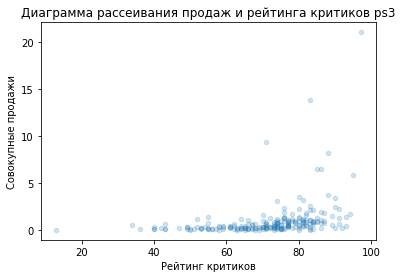

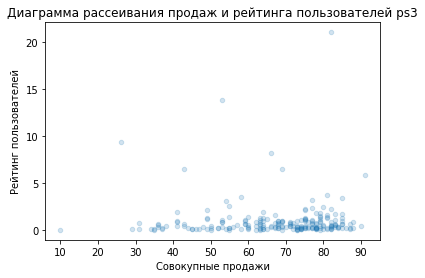

In [64]:
scatter(ps3_scatter, 'Диаграмма рассеивания продаж и рейтинга критиков ps3', 'Диаграмма рассеивания продаж и рейтинга пользователей ps3')

In [65]:
ps3_scatter.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
na_sales,1.000000,0.854178,0.415757,0.892482,0.339676,-0.016470,0.088461,0.941599
eu_sales,0.854178,1.000000,0.440120,0.989664,0.306069,-0.009781,0.061046,0.975175
jp_sales,0.415757,0.440120,1.000000,0.440754,0.169222,0.151985,0.191028,0.508276
other_sales,0.892482,0.989664,0.440754,1.000000,0.312927,0.008117,0.068369,0.986173
critic_score,0.339676,0.306069,0.169222,0.312927,1.000000,0.539456,-0.122496,0.331057
user_score,-0.016470,-0.009781,0.151985,0.008117,0.539456,1.000000,0.193988,0.003227
rating,0.088461,0.061046,0.191028,0.068369,-0.122496,0.193988,1.000000,0.087002
total_sales,0.941599,0.975175,0.508276,0.986173,0.331057,0.003227,0.087002,1.000000


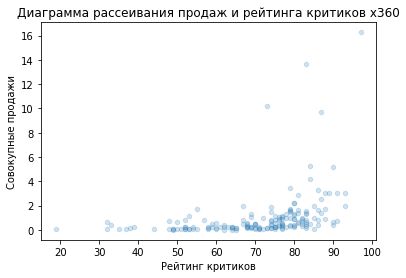

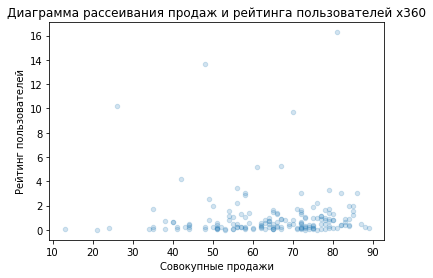

In [66]:
scatter(x360_scatter, 'Диаграмма рассеивания продаж и рейтинга критиков x360', 'Диаграмма рассеивания продаж и рейтинга пользователей x360')

In [67]:
x360_scatter.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
na_sales,1.000000,0.839106,0.544114,0.959771,0.342341,-0.010080,0.103472,0.978952
eu_sales,0.839106,1.000000,0.546194,0.953130,0.354643,0.012583,0.064479,0.932373
jp_sales,0.544114,0.546194,1.000000,0.564496,0.233093,0.038170,0.332658,0.570817
other_sales,0.959771,0.953130,0.564496,1.000000,0.362118,-0.002644,0.089534,0.995383
critic_score,0.342341,0.354643,0.233093,0.362118,1.000000,0.557352,-0.139199,0.360573
user_score,-0.010080,0.012583,0.038170,-0.002644,0.557352,1.000000,0.150204,-0.002014
rating,0.103472,0.064479,0.332658,0.089534,-0.139199,0.150204,1.000000,0.095031
total_sales,0.978952,0.932373,0.570817,0.995383,0.360573,-0.002014,0.095031,1.000000


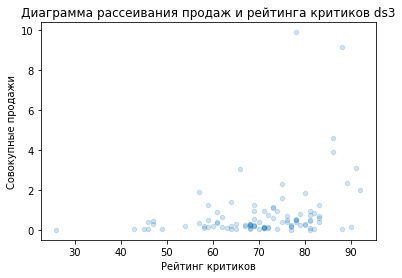

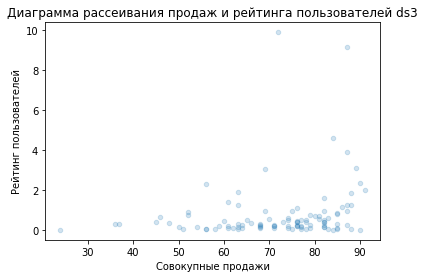

In [68]:
scatter(ds3_scatter, 'Диаграмма рассеивания продаж и рейтинга критиков ds3', 'Диаграмма рассеивания продаж и рейтинга пользователей ds3')

In [69]:
ds3_scatter.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
na_sales,1.000000,0.931039,0.729004,0.988297,0.316306,0.186534,-0.265162,0.939218
eu_sales,0.931039,1.000000,0.817348,0.973007,0.251750,0.140054,-0.297949,0.970197
jp_sales,0.729004,0.817348,1.000000,0.772936,0.299320,0.231463,-0.174533,0.910436
other_sales,0.988297,0.973007,0.772936,1.000000,0.298015,0.171029,-0.279192,0.965366
critic_score,0.316306,0.251750,0.299320,0.298015,1.000000,0.722762,0.088918,0.310553
user_score,0.186534,0.140054,0.231463,0.171029,0.722762,1.000000,0.104480,0.201813
rating,-0.265162,-0.297949,-0.174533,-0.279192,0.088918,0.104480,1.000000,-0.257591
total_sales,0.939218,0.970197,0.910436,0.965366,0.310553,0.201813,-0.257591,1.000000


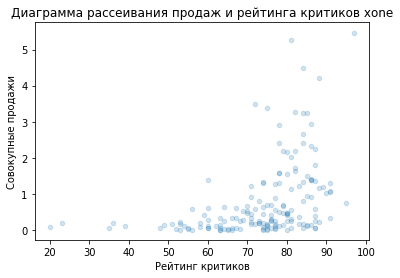

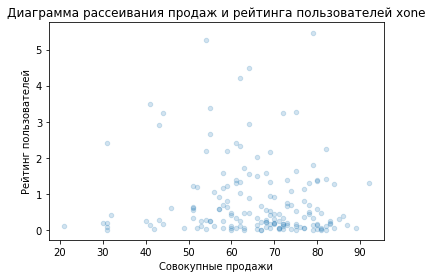

In [70]:
scatter(xone_scatter, 'Диаграмма рассеивания продаж и рейтинга критиков xone', 'Диаграмма рассеивания продаж и рейтинга пользователей xone')

In [71]:
xone_scatter.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
na_sales,1.000000,0.683604,0.400585,0.982840,0.381859,-0.094047,0.233292,0.956913
eu_sales,0.683604,1.000000,0.381617,0.804073,0.373454,-0.075822,0.161843,0.866036
jp_sales,0.400585,0.381617,1.000000,0.419054,0.199978,0.071915,0.138968,0.430736
other_sales,0.982840,0.804073,0.419054,1.000000,0.404996,-0.095963,0.230064,0.993180
critic_score,0.381859,0.373454,0.199978,0.404996,1.000000,0.472462,0.104734,0.410422
user_score,-0.094047,-0.075822,0.071915,-0.095963,0.472462,1.000000,-0.006805,-0.094003
rating,0.233292,0.161843,0.138968,0.230064,0.104734,-0.006805,1.000000,0.224454
total_sales,0.956913,0.866036,0.430736,0.993180,0.410422,-0.094003,0.224454,1.000000


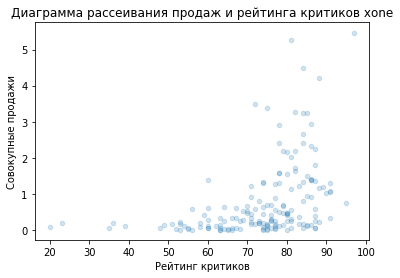

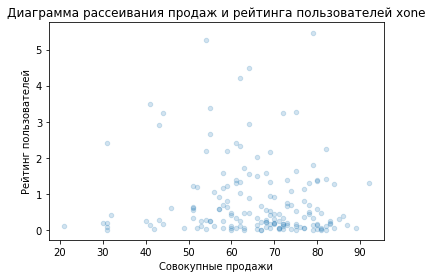

In [72]:
scatter(xone_scatter, 'Диаграмма рассеивания продаж и рейтинга критиков xone', 'Диаграмма рассеивания продаж и рейтинга пользователей xone')

In [73]:
xone_scatter.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
na_sales,1.000000,0.683604,0.400585,0.982840,0.381859,-0.094047,0.233292,0.956913
eu_sales,0.683604,1.000000,0.381617,0.804073,0.373454,-0.075822,0.161843,0.866036
jp_sales,0.400585,0.381617,1.000000,0.419054,0.199978,0.071915,0.138968,0.430736
other_sales,0.982840,0.804073,0.419054,1.000000,0.404996,-0.095963,0.230064,0.993180
critic_score,0.381859,0.373454,0.199978,0.404996,1.000000,0.472462,0.104734,0.410422
user_score,-0.094047,-0.075822,0.071915,-0.095963,0.472462,1.000000,-0.006805,-0.094003
rating,0.233292,0.161843,0.138968,0.230064,0.104734,-0.006805,1.000000,0.224454
total_sales,0.956913,0.866036,0.430736,0.993180,0.410422,-0.094003,0.224454,1.000000


Распределения значений матриц очень схожи, кроме матрицы (продажи - оценка пользователей) - отрицательная корреляция и сильный разброс.
По разным платформам коэф. Пирсона продаж и рейтинга критиков варьируется от 0,2 до 0,4 (в среднем коэфф примерно 0,34) небольшая корреляция всеж присустствует и может варьироваться от 0,2 до 0,4 по различным платформам.
По разным платформам коэф. Пирсона продаж и рейтинга игроков варьируется от -0.09 до 0.23 - большие значения коэффициента редки, корреляция очень слабая.

In [74]:
ps4_scatter[['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.405895
critic_score,0.405895,1.000000


## Определение влияния жанра на продажи и прибыль

In [75]:
df_relevant # таблица с 2012 (актуального) по 2016 год.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,82,5,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,81,5,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-10,-1,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1,-10,-1,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83,53,5,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-10,-1,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1,-10,-1,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-10,-1,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-10,-1,0.01


In [76]:
genre_sales = df_relevant.pivot_table(index='genre', values='total_sales', aggfunc = ['sum', 'count'])
genre_sales.columns = ['total_sales', 'count_games']
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)
genre_sales['sales / one_game'] = genre_sales['total_sales'] / genre_sales['count_games']
genre_sales_sort_one_game = genre_sales.sort_values(by='sales / one_game', ascending=False)

In [77]:
display(genre_sales)
display(genre_sales_sort_one_game)

,total_sales,count_games,sales / one_game
genre,,,
action,441.12,1031,0.427856
shooter,304.73,235,1.296723
role-playing,192.80,370,0.521081
sports,181.07,268,0.675634
misc,85.04,192,0.442917
platform,61.00,85,0.717647
racing,53.50,115,0.465217
fighting,44.49,109,0.408165
simulation,35.12,80,0.439000


,total_sales,count_games,sales / one_game
genre,,,
shooter,304.73,235,1.296723
platform,61.00,85,0.717647
sports,181.07,268,0.675634
role-playing,192.80,370,0.521081
racing,53.50,115,0.465217
misc,85.04,192,0.442917
simulation,35.12,80,0.439000
action,441.12,1031,0.427856
fighting,44.49,109,0.408165


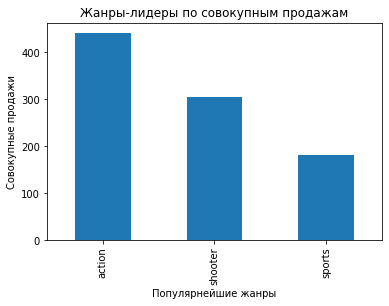

In [78]:
df_relevant.query('genre == "action" or genre == "shooter" or genre == "sports"').groupby('genre')['total_sales'].sum().plot(kind='bar')
plt.title('Жанры-лидеры по совокупным продажам')
plt.xlabel('Популярнейшие жанры')
plt.ylabel('Совокупные продажи')
plt.show()
#plt.show()
#df_relevant.query('genre == "shooter"')['total_sales'].plot(kind='hist', label = 'shooter', legend=True)
#plt.title("shooter")
#plt.show()
#df_relevant.query('genre == "sports"')['total_sales'].plot(kind='hist', label = 'sports', legend=True)
#plt.title("sports")
#plt.show()

Самые большие продажи у жанров action (810.78), shooter (549.03), sports (465.76), role-playing (362.59), misc (310.37). Как видим разница между продажами у жанров большая. Явно выделяются жанры с большими и малыми продажами, малые (platform, racing, fighting, simulation, adventure, strategy, pazle). Но успех самых больших продаж у action обсуловлен просто большим количеством игр данного жанра. В среднем же продажи игр данного жанра находятся в центре рейтинга и = 0.45. А вот shooter продажи на игру самые больши = 1.09, больше чем в 2 раза чем у action. 
Жанр action самый популярный, но имеет большое количество разновидностей, жанры shoter, sports чуть менее популярны, но имеют в 3 раза меньше разновидностей и за счет этого более прибыльны. С другой стороны получить популярность в жанрах shooter и sports намного сложнее, ниши прочно заняты и труднее как-то выделится и привлечь внимание, в отличие от жанрах action где все более вариативно. Важно понимать наши цели и стратегию. Если мы хотим выбрать наиболее потенциальный продукт, то, на мой взгляд, лучше присмотреться к лидерам в жанрах shooter и sport, так как в них много пользователей и относительно мало конкурентов.

## Часть 4 Портереты пользователей по регионам

### Топ-5 самых популярных платформ и жанров

In [79]:
df_relevant # таблица с 2012 (актуального) по 2016 год.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,82,5,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,81,5,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-10,-1,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1,-10,-1,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83,53,5,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-10,-1,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1,-10,-1,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-10,-1,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-10,-1,0.01


In [80]:
na_top_platform = df_relevant.groupby('platform')['na_sales'].sum().nlargest(5)
eu_top_platform = df_relevant.groupby('platform')['eu_sales'].sum().nlargest(5)
jp_top_platform = df_relevant.groupby('platform')['jp_sales'].sum().nlargest(5)

In [81]:
def top_platforms_loc(df, title, xlabel):
    df.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Количество проданных игр')
    plt.show()
    
    display(df)

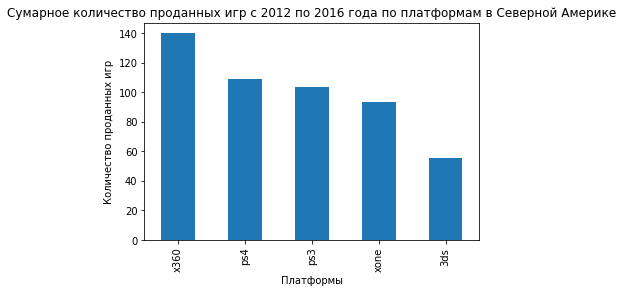

platform
x360    140.05
ps4     108.74
ps3     103.38
xone     93.12
3ds      55.31
Name: na_sales, dtype: float64

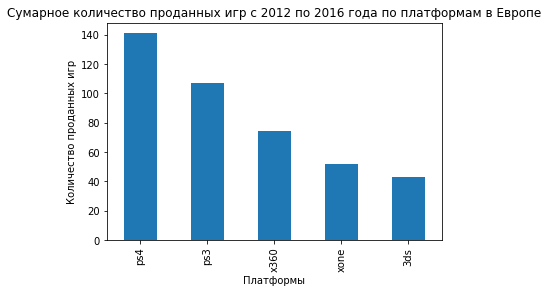

platform
ps4     141.09
ps3     106.86
x360     74.52
xone     51.59
3ds      42.64
Name: eu_sales, dtype: float64

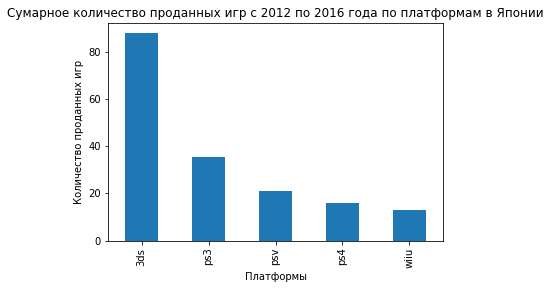

platform
3ds     87.79
ps3     35.29
psv     21.04
ps4     15.96
wiiu    13.01
Name: jp_sales, dtype: float64

In [82]:
top_platforms_loc(na_top_platform, 'Сумарное количество проданных игр с 2012 по 2016 года по платформам в Северной Америке', 'Платформы')
top_platforms_loc(eu_top_platform, 'Сумарное количество проданных игр с 2012 по 2016 года по платформам в Европе', 'Платформы')
top_platforms_loc(jp_top_platform, 'Сумарное количество проданных игр с 2012 по 2016 года по платформам в Японии', 'Платформы')

- В Северной Америке больше используются статичные приставки (не карманные) - наиболее популярны платформы x360 (топ), ps4 и ps3, далее идет xone , 3ds - мобильный гаджет для игр.
- В Европе также полпулярны ps4, ps3 и x360, но топ здесь ps4, а х360 на 3-ем месте, далее следует набирающая популярность xone, еще далее 3ds. Мобильные гаджеты для игр относительно не развиты на данной территории.
- Япония - все каординально по другому, в топе популярности переносные гаджеты для игр 3 ds (явный лидер). ps3 занимает 2-е место ( с большим отрывом от 1-ого). далее последовательно идут psv, ps4 и wiiu.

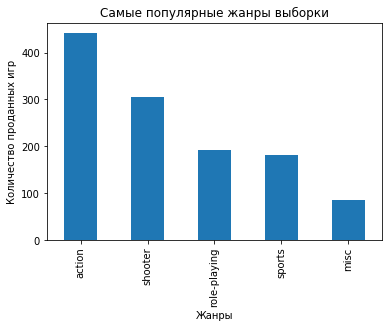

genre
action          441.12
shooter         304.73
role-playing    192.80
sports          181.07
misc             85.04
Name: total_sales, dtype: float64

In [83]:
na_top_genre = df_relevant.groupby('genre')['na_sales'].sum().nlargest(5)
eu_top_genre = df_relevant.groupby('genre')['eu_sales'].sum().nlargest(5)
jp_top_genre = df_relevant.groupby('genre')['jp_sales'].sum().nlargest(5)
top_platforms_loc(df_relevant.groupby('genre')['total_sales'].sum().nlargest(5), "Самые популярные жанры выборки", "Жанры")

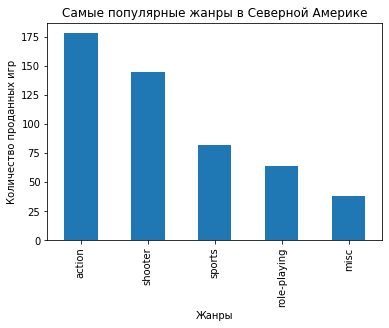

genre
action          177.84
shooter         144.77
sports           81.53
role-playing     64.00
misc             38.19
Name: na_sales, dtype: float64

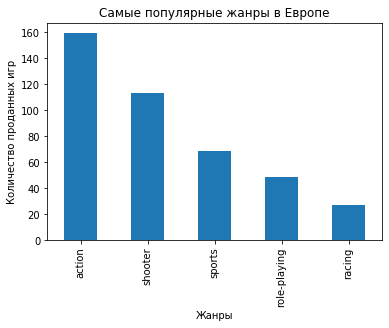

genre
action          159.34
shooter         113.47
sports           69.09
role-playing     48.53
racing           27.29
Name: eu_sales, dtype: float64

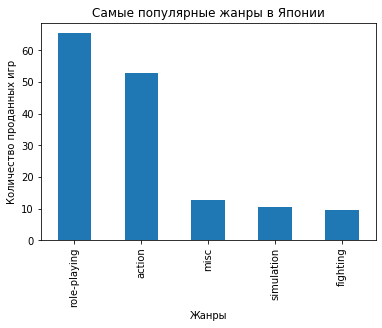

genre
role-playing    65.44
action          52.80
misc            12.86
simulation      10.41
fighting         9.44
Name: jp_sales, dtype: float64

In [84]:
top_platforms_loc(na_top_genre, "Самые популярные жанры в Северной Америке", "Жанры")
top_platforms_loc(eu_top_genre, "Самые популярные жанры в Европе", "Жанры")
top_platforms_loc(jp_top_genre, "Самые популярные жанры в Японии", "Жанры")

Популярность жанров в Северной Америке и Европе практически идиентична - action, shooter, sports, misc, role-playing (разница между жанрами примерно пропорциональна).
В Японии же все очень сильно по-другому, наверняка из-за разницы в культуре. role-playing и action - явные лидеры (action 120 и 84 соответственно) , далее misc< sports, platform (30, 25, 20). У Японцев общие с Северной Америкой и Европой жанры, это action (тоже поулярен, но не так сильно, misc, sports (примерно те же позиции) и role-playing - топ-1 в Японии и топ-5 в Северной Америке и Европпе.

### Влияние рейтинга ESRB на продажи по регионам

In [85]:
df_relevant # таблица с 2012 (актуального) по 2016 год.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,82,5,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,81,5,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-10,-1,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1,-10,-1,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83,53,5,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-10,-1,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1,-10,-1,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-10,-1,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-10,-1,0.01


In [86]:
df['rating'] = df['rating'].fillna(-1)          # Нет рейтинга
df['rating'] = df['rating'].replace("ec", 1)    # дети 3+
df['rating'] = df['rating'].replace("e", 2)     # дети 6+
df['rating'] = df['rating'].replace("e10+", 3)  # дети 10+
df['rating'] = df['rating'].replace("t", 4)     # 13+
df['rating'] = df['rating'].replace("m", 5)     # 17+ 
df['rating'] = df['rating'].replace("ao", 6)    # 18+
df['rating'] = df['rating'].replace("rp", -1)   # Нет рейтинг
df['rating'] = df['rating'].replace("k-a", 7)    # kids to adults (всего 3 значения)

In [87]:
rating_na_sales = df_relevant.groupby('rating')['na_sales'].sum()
rating_eu_sales = df_relevant.groupby('rating')['eu_sales'].sum()
rating_jp_sales = df_relevant.groupby('rating')['jp_sales'].sum()

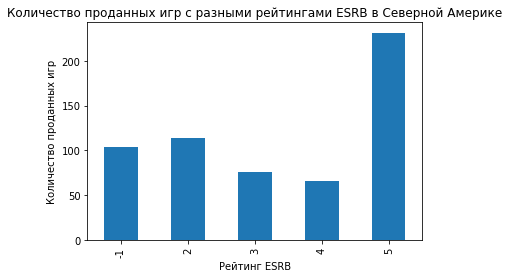

rating
-1    103.31
 2    114.37
 3     75.70
 4     66.02
 5    231.57
Name: na_sales, dtype: float64

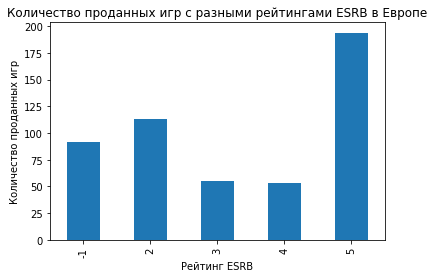

rating
-1     91.50
 2    113.03
 3     55.37
 4     52.96
 5    193.96
Name: eu_sales, dtype: float64

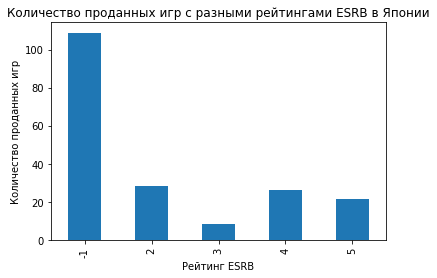

rating
-1    108.84
 2     28.33
 3      8.19
 4     26.02
 5     21.20
Name: jp_sales, dtype: float64

In [88]:
top_platforms_loc(rating_na_sales, "Количество проданных игр с разными рейтингами ESRB в Северной Америке", "Рейтинг ESRB")
top_platforms_loc(rating_eu_sales, "Количество проданных игр с разными рейтингами ESRB в Европе", "Рейтинг ESRB")
top_platforms_loc(rating_jp_sales, "Количество проданных игр с разными рейтингами ESRB в Японии", "Рейтинг ESRB")

In [89]:
def rating_sales(df, title):
    df.plot(x='rating')
    plt.title(title)
    plt.xlabel('Рейтинг ESRB')
    plt.ylabel('Совокупные продажи')
    plt.show()

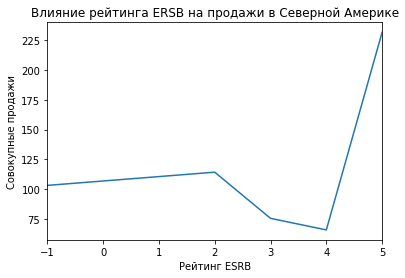

In [90]:
rating_sales(rating_na_sales, "Влияние рейтинга ERSB на продажи в Северной Америке")

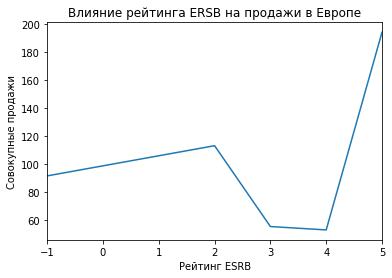

In [91]:
rating_sales(rating_eu_sales, "Влияние рейтинга ERSB на продажи в Европе")

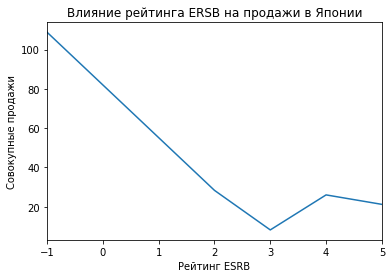

In [92]:
rating_sales(rating_jp_sales, "Влияние рейтинга ERSB на продажи в Японии")

В Северной Америке и Европе ситуация с влиянием рейтинга ERSB на продажи идиентична. Наименьший рейтинг у игр 3+ (в Японии кстати также), - детям лучше вообще не играть в приставки в таком возрасте - спрос понятен. Дальше идет пик 6+, в этом возрасте родители стараются следить за детьми и развивать, сами же дети более любознательные. рейтинги для дете 10+ и 13+ ниже (возможно такие игры неинтересны сами детям или игр стаким рейтингом просто меньше. Самый ТОП это игры 17+ - тут все понятно - контент хочется позабористей. Игры с рейтингом 18+ в выборку не попали, наверняка они попали в группу рейтинг не присвоен и скорей всего у них высокие рейтинг (так как все хотят более забористый контент, но это только предположение и сделано оно не исходя и из выборки. Надо что делать с выборкой чтобы понять продажи игр с рейтингом 18+.
В Японии картина сильно отличается - там наибольший рейтинг имеют игры 6+(не считая категории неизвестный рейтинг, где видно, что контент 18+ самый популярный (так как больше нет вариантов)), они почти на одном уровне с играми 13+, наименьший рейтинг у игр 10+ и 17+.

## Часть 5 Проверка гипотез

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [113]:
xone = df_relevant.query('platform == "xone" and user_score != -10')['user_score']
pc = df_relevant.query('platform == "pc" and user_score != -10')['user_score']

In [116]:
print('Дисперсия пользовательского рейтинга по платформе xone:', np.var(xone, ddof=1))
print('Дисперсия пользовательского рейтинга по платформе pc:', np.var(pc, ddof=1))

Дисперсия пользовательского рейтинга по платформе xone: 190.69968429360694
Дисперсия пользовательского рейтинга по платформе pc: 277.04439971584185


In [95]:
df_relevant['platform'].unique()

array(['ps3', 'x360', 'ps4', '3ds', 'ds', 'xone', 'wiiu', 'wii', 'pc',
       'psv', 'psp'], dtype=object)

In [96]:
xone = df_relevant.query('platform == "xone"')['user_score']
pc = df_relevant.query('platform == "pc"')['user_score']

alpha =.05

hypothesis_1 = st.ttest_ind(xone, pc, equal_var = True)

print('p-значение:', hypothesis_1.pvalue)

if (hypothesis_1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.05605440473353084
Не получилось отвергнуть нулевую гипотезу


### Нулевая гипотеза: средние пользовательские рейтинги жанров Action  и Sports равны

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports отличаются.

In [97]:
action = df_relevant.query('genre == "action" and user_score != -10')['user_score']
sports = df_relevant.query('genre == "sports" and user_score != -10')['user_score']

In [98]:
print('Дисперсия пользовательского рейтинга по жанру action:', np.var(action, ddof=1))
print('Дисперсия пользовательского рейтинга по жанру sports:', np.var(sports, ddof=1))

Дисперсия пользовательского рейтинга по жанру action: 188.90840494348112
Дисперсия пользовательского рейтинга по жанру sports: 302.2890298704732


В Т-Тесте будем использовать equal_var = True, так как дисперсии выборок не сильно различаются.

In [99]:
action = df_relevant.query('genre == "action"')['user_score']
sports = df_relevant.query('genre == "sports"')['user_score']

alpha =.05

hypothesis_1 = st.ttest_ind(xone, pc, equal_var = True)

print('p-значение:', hypothesis_1.pvalue)

if (hypothesis_1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.05605440473353084
Не получилось отвергнуть нулевую гипотезу


Формулировал нулевую и альтернативную гипотезы исходя из задания и того, чтобы нулевая гипотеза формулировалась так чтобы бы был использован знак равенства. Для проверки гипотез использовали т-тест, а именно метод st.ttest_ind, так как мы работаем с выборкой, а не генеральной совокупностью и у нас значений относительно немного.

## Общий вывод

Выявленны следующие закономерности, влияющие на успешнеость игр:
- рейтинг критиков (0,2 до 0,4 (в среднем коэфф примерно 0,34))
- жизненный цикл платформ (более перспективны современные платформы ps4 и xone, остальные быстро отходят на второй план (почти ушли)
- Также в этом плане важна география продаж, соотношение продаж в Северной Америке, Европе и Японии соответственно 1465.96 : 1029.15 : 367:
В Северной Америке больше используются статичные приставки (не карманные) - наиболее популярны платформы x360 (топ), ps4 и ps3, далее идет xone , 3ds - мобильный гаджет для игр.
В Европе также полпулярны ps4, ps3 и x360, но топ здесь ps4, а х360 на 3-ем месте, далее следует набирающая популярность xone, еще далее 3ds. Мобильные гаджеты для игр относительно не развиты на данной территории.
Япония - все каординально по другому, в топе популярности переносные гаджеты для игр 3 ds (явный лидер). ps3 занимает 2-е место ( с большим отрывом от 1-ого). далее последовательно идут psv, ps4 и wiiu.
- Наиболее популярны в общем жанры: action (441), shooter (304), role-playing (192), sports (181) и misc (85).
Популярность жанров в Северной Америке и Европе практически идиентична - action, shooter, sports, misc, role-playing (разница между жанрами примерно пропорциональна). В Японии же все очень сильно по-другому, наверняка из-за разницы в культуре. role-playing и action - явные лидеры, далее misc< sports, platform. У Японцев общие с Северной Америкой и Европой жанры, это action (тоже поулярен, но не так сильно, misc, sports (примерно те же позиции) и role-playing - топ-1 в Японии и топ-5 в Северной Америке и Европпе.

- Большие продажи у игр с рейтинго ERSB 17+, 18+ (скорей всего) и 6+.
В Северной Америке и Европе ситуация с влиянием рейтинга ERSB на продажи идиентична. Наименьший рейтинг у игр 3+ (в Японии кстати также), - детям лучше вообще не играть в приставки в таком возрасте - спрос понятен. Дальше идет пик 6+, в этом возрасте родители стараются следить за детьми и развивать, сами же дети более любознательные. рейтинги для дете 10+ и 13+ ниже (возможно такие игры неинтересны сами детям или игр стаким рейтингом просто меньше. Самый ТОП это игры 17+ - тут все понятно - контент хочется позабористей. Игры с рейтингом 18+ в выборку не попали, наверняка они попали в группу рейтинг не присвоен и скорей всего у них высокие рейтинг (так как все хотят более забористый контент, но это только предположение и сделано оно не исходя и из выборки. Надо что делать с выборкой чтобы понять продажи игр с рейтингом 18+. В Японии картина сильно отличается - там наибольший рейтинг имеют игры 6+(не считая категории неизвестный рейтинг, где видно, что контент 18+ самый популярный (так как больше нет вариантов)), они почти на одном уровне с играми 13+, наименьший рейтинг у игр 10+ и 17+.